**ANN WHITE BLOOD CELLS CLASSIFICATION ALGORITHM**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import listdir
import cv2
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer


In [ ]:
data = []
folder_dir = "drive/My Drive/Raabin - WBC/crop_dataset/"
count = 0
for wbc in os.listdir(folder_dir):
    count=0
    for images in os.listdir(folder_dir+"/"+wbc):
        data.append([folder_dir+"/"+wbc+"/"+images,wbc])
data1 = pd.DataFrame(data,columns=['images','Category'])
data1.head()

,images,Category
0,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
1,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
2,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
3,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
4,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil


In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [ ]:
data = []
lables = []
c = 0 ## to see the progress
for image in pbar(data1['images']):

    lables.append(data1['Category'][c])

    img = cv2.imread(image)
    data.append(img)
    c=c+1

100% (60 of 60) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
data = np.load("drive/My Drive/Raabin - WBC/data.npy")
lables = np.load("drive/My Drive/Raabin - WBC/lable.npy")

In [ ]:
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)
lables_df = pd.DataFrame(np.unique(lables))
le = LabelEncoder()
lables = le.fit_transform(lables)
lb = LabelBinarizer()
one_hot = lb.fit_transform(lables)

In [ ]:
(trainX, testX, trainY, testY ) = train_test_split(data, one_hot, test_size= 0.25,random_state=42)
trainX = trainX/255
testX = testX/255

**ANN**

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(80,80,3)),
        layers.Dense(5000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(trainX, trainY, epochs=5)

Epoch 1/5
130/130 [==============================] - 48s 360ms/step - loss: 1.2183 - accuracy: 0.4389
Epoch 2/5
130/130 [==============================] - 48s 369ms/step - loss: 0.9558 - accuracy: 0.5828
Epoch 3/5
130/130 [==============================] - 47s 362ms/step - loss: 0.8481 - accuracy: 0.6465
Epoch 4/5
130/130 [==============================] - 49s 374ms/step - loss: 0.7355 - accuracy: 0.6860
Epoch 5/5
130/130 [==============================] - 47s 362ms/step - loss: 0.6931 - accuracy: 0.7171


In [ ]:
!pip install visualkeras

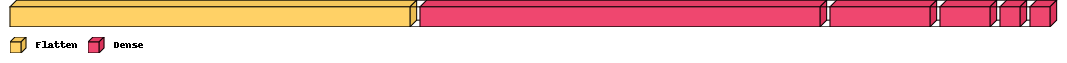

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(ann, legend=True)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes
print("Classification Report: \n", classification_report([np.argmax(element) for element in testY], y_pred_classes))

44/44 [==============================] - 5s 109ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.33      0.50       353
           1       0.95      0.76      0.85       323
           2       0.47      0.96      0.63       336
           3       0.80      0.70      0.75       371

    accuracy                           0.68      1383
   macro avg       0.80      0.69      0.68      1383
weighted avg       0.80      0.68      0.68      1383



44/44 [==============================] - 4s 98ms/step
Accuracy: 0.68


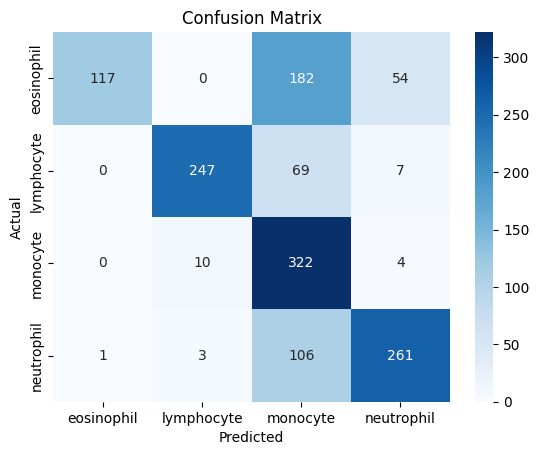

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
y_pred = ann.predict(testX)
# Evaluate accuracy
y_pred = le.inverse_transform([np.argmax(element) for element in y_pred])

accuracy = accuracy_score(le.inverse_transform([np.argmax(element) for element in testY]), y_pred)
print(f"Accuracy: {accuracy:.2f}")
# print(y_pred)
# print(le.inverse_transform([np.argmax(element) for element in testY]))

# Create confusion matrix
conf_mat = confusion_matrix(le.inverse_transform([np.argmax(element) for element in testY]),y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(lables_df[0]), yticklabels=np.unique(lables_df[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()